# tensorflow技术解析与实践 李佳璇
---

# 4 basic
---
> ## 数据标准化处理
常用在激活函数处理之前，把数据变成均值为0，方差为1.

```python
# 计算平均值和方差
mean, variance = tf.nn.moments(x, axes, shift=None, name=None, keep_dims=False)

# 标准化处理
tf.nn.batch_normalization(x, mean, variance, offset, scale, variance_epsilon, name=None)
```
**eg:**
```python

```
> ## 激活函数

1. 当输入**数据特征相差明显**时，用**tanh**的效果会很好。在循环的过程中会不断的扩大特征效果。
2. 当特征相差**不明显**时**sigmoid**效果比较好
3. 从sigmoid和tanh的**函数分布**可以发现，过大的输入会造成输出平缓，不利于梯度下降，所以在进行激活函数前要进行**数据标准化**处理。
4. relu相对较好，大部分神经网络的激活函数会使用relu。

```python
# 常用的激活函数
tf.nn.relu()
tf.nn.sigmoid()
tf.nn.tanh()
tf.nn.dropout()
tf.nn.elu()
tf.nn.crelu()
tf.nn.relu6()
tf.nn.bias_add()
tf.nn.softplus()
tf.nn.softsign()
```

> ## 卷积函数

```python
# 计算N维卷积的和
tf.nn.convolution()

# 对四维输入数据和四维卷积核进行操作
tf.nn.conv2d()

# 
tf.nn.depthwise_conv2d()

# 利用几个分离的卷积核去做卷积
tf.nn.separable_conv2d()

# 计算Atrous卷积，孔卷积，扩张卷积
tf.nn.atrous_conv2d

# 反卷积
tf.nn.conv2d_transpose()

# 三维输入
tf.nn.conv1d()

# 五维输入
tf.nn.conv3d()

```

> ## 池化

```python
tf.nn.avg_pool()
tf.nn.max_pool()
tf.nn.max_pool_with_argmax()
tf.nn.avg_pool3d()
tf.nn.fractional_max_pool()
tf.nn.fractional_avg_pool()
tf.nn.pool()
```

> ## 分类函数

```python
tf.nn.sigmoid_cross_entropy_with_logits()
tf.nn.softmax()
tf.nn.log_softmax()
tf.nn.softmax_cross_entropy_with_logits()
tf.nn.sparse_softmax_cross_entropy_with_logits()
```
> ## 优化方法-梯度下降

```python
tf.train.GradientDescentOptimizer()
tf.train.AdadeltaOptimizer()
tf.train.AdagradDAOptimizer()
tf.train.AdagradOptimizer
tf.train.AdamOptimizer()
tf.train.MomentumOptimizer()
tf.train.FtrlOptimizer()
tf.train.RMSPropOptimizer()
```

> ## AlexNet for mnist

AlexNet的主要突破：
- 使用relu
- 增加dropout
- 双gpu计算

这里实现一个relu和dropout的mnist。

In [5]:
tf.train.GradientDescentOptimizer()
tf.train.AdadeltaOptimizer()
tf.train.AdagradDAOptimizer()
tf.train.AdagradOptimizer
tf.train.AdamOptimizer()
tf.train.MomentumOptimizer()
tf.train.FtrlOptimizer()
tf.train.RMSPropOptimizer()

In [70]:
mnist = input_data.read_data_sets('D:/softfiles/workspace/data/tensorflow/data/', one_hot=True)

Extracting D:/softfiles/workspace/data/tensorflow/data/train-images-idx3-ubyte.gz
Extracting D:/softfiles/workspace/data/tensorflow/data/train-labels-idx1-ubyte.gz
Extracting D:/softfiles/workspace/data/tensorflow/data/t10k-images-idx3-ubyte.gz
Extracting D:/softfiles/workspace/data/tensorflow/data/t10k-labels-idx1-ubyte.gz


## 自编码网络

In [73]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as mp

learning_rate = 0.01
training_epochs = 20
batch_size = 256
display_step = 1

examples_to_show = 10

n_input = 28 * 28
n_hidden_1 = 256
n_hidden_2 = 128

X = tf.placeholder('float', [None, n_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_input])),
}

biases = {
    'encoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([n_input])),
}

def encoder(x):
    layer_1 = tf.nn.sigmoid(tf.nn.bias_add(tf.matmul(x, weights['encoder_h1']), biases['encoder_b1']))
    layer_2 = tf.nn.sigmoid(tf.nn.bias_add(tf.matmul(layer_1, weights['encoder_h2']), biases['encoder_b2']))
    return layer_2

def decoder(x):
    layer_1 = tf.nn.sigmoid(tf.nn.bias_add(tf.matmul(x, weights['decoder_h1']), biases['decoder_b1']))
    layer_2 = tf.nn.sigmoid(tf.nn.bias_add(tf.matmul(layer_1, weights['decoder_h2']), biases['decoder_b2']))
    return layer_2

encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

y_pred = decoder_op
y_true = X

cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
    mnist = input_data.read_data_sets('D:/softfiles/workspace/data/tensorflow/data/', one_hot=True)
    
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for epoch in range(training_epochs):
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, c = sess.run([optimizer, cost], feed_dict={X: batch_xs})
        if epoch % display_step == 0:
            print('Epoch:{:02d}, cost={:.9f}'.format(epoch+1, c))
            
    encoder_decoder = sess.run([y_pred], feed_dict={X: mnist.test.images[:examples_to_show]})
    


Extracting D:/softfiles/workspace/data/tensorflow/data/train-images-idx3-ubyte.gz
Extracting D:/softfiles/workspace/data/tensorflow/data/train-labels-idx1-ubyte.gz
Extracting D:/softfiles/workspace/data/tensorflow/data/t10k-images-idx3-ubyte.gz
Extracting D:/softfiles/workspace/data/tensorflow/data/t10k-labels-idx1-ubyte.gz
Epoch:01, cost=0.210136607
Epoch:02, cost=0.178893641
Epoch:03, cost=0.152304083
Epoch:04, cost=0.144692153
Epoch:05, cost=0.135717347
Epoch:06, cost=0.130914450
Epoch:07, cost=0.130694896
Epoch:08, cost=0.121630162
Epoch:09, cost=0.119201347
Epoch:10, cost=0.112282075
Epoch:11, cost=0.109249271
Epoch:12, cost=0.106748708
Epoch:13, cost=0.109525174
Epoch:14, cost=0.106132858
Epoch:15, cost=0.102926485
Epoch:16, cost=0.099812955
Epoch:17, cost=0.098618865
Epoch:18, cost=0.097086214
Epoch:19, cost=0.095529631
Epoch:20, cost=0.094088137


D:\softfiles\programs\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


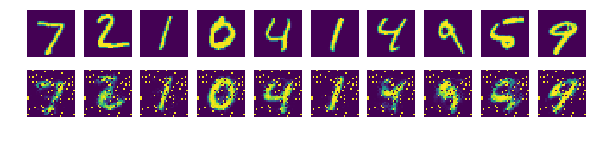

In [103]:
f, a = mp.subplots(2, 10, figsize=(10, 2))
for i in range(examples_to_show):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    a[1][i].imshow(np.reshape(encoder_decoder[0][i], (28, 28)))
    a[0][i].set_axis_off()
    a[1][i].set_axis_off()
f.show()
# mp.draw()
# mp.waitfo\buttonpress()